<a href="https://colab.research.google.com/github/D4deben/DA6401_Assignment1/blob/main/DL_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wandb -qU
!pip install numpy
!pip install matplotlib
!pip install pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/20.8 MB 25.5 MB/s eta 0:00:00


In [2]:
import wandb
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: cs24m016 (cs24m016-indian-institute-of-technology-madras) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [4]:
import wandb

# Initialize wandb
wandb.init(
    project="DL_A1" ,resume=True
)


In [5]:
#loading the dataset

from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

class_names= ['T-shirt', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# i want to convert the dataset into sub dataset based obn common labels

label_grp={label:[] for label in range(10)}

for img,label in zip(X_train,y_train):
  label_grp[label].append(img)
for label in label_grp:
    label_grp[label] = np.array(label_grp[label])
sweep_config = {
    "method": "random",  # Random search for hyperparameters
    "metric": {"name": "accuracy", "goal": "maximize"},  # Example metric
    "parameters": {
        "learning_rate": {"values": [0.001, 0.01, 0.1]},
        "batch_size": {"values": [32, 64, 128]}
    }
}

sweep_id = wandb.sweep(sweep_config, project="DL_A1")

def train():
    # Initialize W&B for this run
    wandb.init(project="DL_A1", config=sweep_config)

    sweep_run_id = wandb.run.sweep_id  # Get the sweep ID
    run_name = wandb.run.name  # Run name

    for run_id in range(10):  # Each run will log different random images

        for step in range(3):  # Log over 3 steps
            selected_images = []
            selected_labels = []

            for label in labels_grp:
                img = random.choice(labels_grp[label])  # Pick a random image
                selected_images.append(img)
                selected_labels.append(class_names[label])  # Store class name
            image_data = []
            for index, (img, label) in enumerate(zip(selected_images, selected_labels)):
                # Include Sweep ID and Run Name in the caption
                image_data.append(wandb.Image(img, caption=f"{label} (Index: {index}) - Sweep: {sweep_run_id} - {run_name}"))

            # Log images at the current step
            wandb.log({"examples": image_data, "Step": step})

    # Finish logging
    wandb.finish()


# Run the Sweep for 150 Runs
wandb.agent(sweep_id, function=train, count=150)


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


Create sweep with ID: 9259uo0m
Sweep URL: https://wandb.ai/cs24m016-indian-institute-of-technology-madras/DL_A1/sweeps/9259uo0m


wandb: Agent Starting Run: qey0jl83 with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.01


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: 84uzv8e3 with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: m4bqxohu with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.01


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: v33bwq4e with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.01


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: 1bjffbtb with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.01


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 0perr13e with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.1


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: f56rjaue with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: sjz9tw6v with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.01


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: drg6r201 with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.1


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: vhh938lg with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: beezs6jc with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.01


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: ndwjztdr with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.1


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: l8skhodw with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.1


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: mouvdiww with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: wtshrrm8 with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: oh1yxd7w with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: 74hb6s8o with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: neo1y8i2 with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: rzmi1j0e with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.01


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: xra0qld1 with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: 7k0kkwcb with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: lznn5gzq with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.01


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: j4tmwk86 with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: wmk5zlt5 with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.01


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: offm75bs with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.01


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: po4pwcc9 with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: 443wavql with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.1


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: 40vu5m9z with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.1


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: nvla8hqe with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.1


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: mlyjg5sk with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.1


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: l870vi77 with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.1


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: vl0lwo7h with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.1


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: yy960atl with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.01


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: ck2mdu7t with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.01


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: g25ul9ew with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.01


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: 3ceviwwb with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.1


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: wk06qjlm with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.1


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: a5f0vq79 with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: jock70b0 with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.01


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: rmuvcx75 with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.1


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 246vjkjm with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.01


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: dy66g2dc with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.1


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: tzg59jbw with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: z4vm3wf3 with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.01


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: lrjhg9rl with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.1


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: xcwm1gjq with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.01


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: zfij28em with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.1


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: fk6uqk1j with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.1


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: ao9vj9ro with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.01


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ni80piij with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: 3ddgswwg with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.01


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: 7j5tkkhn with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.01


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: prvf13g3 with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: 7ceunu8t with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.01


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: vo115mz5 with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: re05cd3y with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: lsearjqk with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: ck9kqy95 with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: go4ypy7j with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.01


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: nvq8k1b0 with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.01


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: i97ytecm with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.1


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: ecwzcw96 with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: cppqjak7 with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: 3li408n9 with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: opbztgl1 with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.1


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 93v4ef2x with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.1


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: 82kx3u2s with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.01


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: o7qeqzqa with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.1


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: 5dubv506 with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: 664u1tyg with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: y9n1ttmw with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.1


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: fp9071w9 with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: x1vjo0jt with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: 7kbie0b7 with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: gpppkf8s with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.1


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: 68aqp3h9 with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.1


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: gvc2ubh0 with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.01


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: gao8zo5g with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.01


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: vpmkso28 with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.1


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: yazsqsjm with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: m9pckrgt with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.1


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: kpl3bc8k with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: s3r6z39z with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.1


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: ugd2eii7 with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.1


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: qeoy3xwg with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: ywbuv1bx with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.1


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: o9cxouko with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.01


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: fflw0tvy with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: 66pe7xmg with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.01


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: wzpr5jvg with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.01


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ioqaa6vn with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: zsdtw8uf with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: qozzci7e with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.1


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: 8sks7dvw with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: ptgf5lw0 with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.01


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: yrvmn8s0 with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.1


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: tqt5o8d2 with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: 4ybqjx7a with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: wz4h9ytg with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.01


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: s0wgkhlp with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.01


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: gc7077f4 with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.01


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 5b9795c3 with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.1


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: f15hwuv3 with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: 4q6rdlv7 with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: yj2incl9 with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.1


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: 5ixtqxcy with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.01


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: iqf5c8ww with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.01


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: fo817pa4 with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: 1f9s0jzv with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.01


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: x8e7tw3l with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: b1jbkuyg with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.01


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: nasgajbs with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.1


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: 3us9zkgl with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: 0x48ewtn with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: 4er6eiak with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.1


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ig76t9n0 with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: 8gz44r26 with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.1


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: 25ktcy9o with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.01


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: d1s2i4a6 with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.01


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: rud6fk5f with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: hh1his20 with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: kivcviqh with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.1


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: e8zk4shw with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: zgufcipw with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.1


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: cdyr5rlz with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: q7d4pfi5 with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.1


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: 86345en0 with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: 4ohz19to with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.1


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 74ce1ie1 with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: bmd1boms with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: p8cxpsy9 with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.1


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: 9wiru00k with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.1


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: mpovdovq with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: w38ikmej with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: cfmgrlsj with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.1


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: vpsd8tq9 with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.01


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: uzfsnnv5 with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.1


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: cvax4juj with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.01


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: yb72g1uj with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.01


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: 6xyb1de5 with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.01


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: 2a1ibqm7 with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: ml0l3cze with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.01


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: azbyoont with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 9ks2hvkm with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.01


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: tbo4phnh with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: qhktbqga with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.1


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: 6sxnr4fj with config:
wandb: 	batch_size: 128
wandb: 	learning_rate: 0.01


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: si11vpe0 with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: xki02too with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.01


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


wandb: Agent Starting Run: tfq9c7qh with config:
wandb: 	batch_size: 64
wandb: 	learning_rate: 0.001


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


In [ ]:

# Group images by label
labels_grp = {label: [] for label in range(10)}

for img, label in zip(X_train, y_train):
    labels_grp[label].append(img)

# Convert lists to NumPy arrays for easier handling
for label in labels_grp:
    labels_grp[label] = np.array(labels_grp[label])


# Select one random image from each label
selected_images = []
selected_labels = []

for label in labels_grp:
    img = random.choice(labels_grp[label])  # Pick a random image
    selected_images.append(img)
    selected_labels.append(class_names[label])  # Store class name


# Initialize WandB
wandb.init(project="DL_A1")

# Log images over multiple steps
for run_id in range(10):  # Log over 10 runs
  selected_images = []
  selected_labels = []

  for label in labels_grp:
      img = random.choice(labels_grp[label])  # Pick a random image
      selected_images.append(img)
      selected_labels.append(class_names[label])  # Store class name

  for step in range(3):  # Log over 3 steps
      image_data = []
      for index, (img, label) in enumerate(zip(selected_images, selected_labels)):
          image_data.append(wandb.Image(img, caption=f"{label} (Index: {index})"))

      # Log images at the current step
      wandb.log({"examples": image_data, "Step": step})

# Finish logging
wandb.finish()


Step,▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█▁▅█
Step,2


In [ ]:
#taking the first occ

import wandb
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

# Load FashionMNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Class names in FashionMNIST
class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Extract one sample per class
sample_images = []
sample_labels = []
for i in range(10):
    idx = np.where(train_labels == i)[0][0]  # Find first occurrence of class i
    sample_images.append(train_images[idx])
    sample_labels.append(class_names[i])

# Simulate logging from 10 of 190 runs
for run_id in range(10):
    wandb.init(project="DL_A1", name=f"Run_{run_id}")

    for step in range(10):  # Simulating 10 steps per run
        media_panel = []

        for idx, img in enumerate(sample_images):
            media_panel.append(wandb.Image(img, caption=f"{sample_labels[idx]} (Step {step}, Index {idx})"))

        # Log images with step & index tracking
        wandb.log({"examples": media_panel, "Step": step, "Index": idx})

    wandb.finish()


Index,▁▁▁▁▁▁▁▁▁▁
Step,▁▂▃▃▄▅▆▆▇█
Index,9
Step,9


Index,▁▁▁▁▁▁▁▁▁▁
Step,▁▂▃▃▄▅▆▆▇█
Index,9
Step,9


Index,▁▁▁▁▁▁▁▁▁▁
Step,▁▂▃▃▄▅▆▆▇█
Index,9
Step,9


Index,▁▁▁▁▁▁▁▁▁▁
Step,▁▂▃▃▄▅▆▆▇█
Index,9
Step,9


Index,▁▁▁▁▁▁▁▁▁▁
Step,▁▂▃▃▄▅▆▆▇█
Index,9
Step,9


Index,▁▁▁▁▁▁▁▁▁▁
Step,▁▂▃▃▄▅▆▆▇█
Index,9
Step,9


Index,▁▁▁▁▁▁▁▁▁▁
Step,▁▂▃▃▄▅▆▆▇█
Index,9
Step,9


Index,▁▁▁▁▁▁▁▁▁▁
Step,▁▂▃▃▄▅▆▆▇█
Index,9
Step,9


Index,▁▁▁▁▁▁▁▁▁▁
Step,▁▂▃▃▄▅▆▆▇█
Index,9
Step,9


Index,▁▁▁▁▁▁▁▁▁▁
Step,▁▂▃▃▄▅▆▆▇█
Index,9
Step,9


In [ ]:
wandb agent cs24m016-indian-institute-of-technology-madras/DL_A1/3clw4tak

SyntaxError: invalid decimal literal (<ipython-input-15-c87c88de6e86>, line 1)

In [ ]:
import wandb
import numpy as np
import random
from keras.datasets import fashion_mnist

# Load FashionMNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Class names in FashionMNIST
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Group images by label (store all images per class)
labels_grp = {label: [] for label in range(10)}
for img, label in zip(X_train, y_train):
    labels_grp[label].append(img)

# Convert lists to NumPy arrays
for label in labels_grp:
    labels_grp[label] = np.array(labels_grp[label])

# 🔹 189 Sweeps (as shown in your image)
sweep_id = "d4deben"

# 🔹 Run 10 of 189 experiments for panel visualization
for run_id in range(200):  # Adjust number of runs displayed in panel
    wandb.init(project="DL_A1", name=f"Run_{run_id}", group=sweep_id)

    for step in range(5):  # 🔹 Step slider (increments on each wandb.log)
        image_data = []

        # 🔹 Select **random images** per class (not just the first one)
        selected_images = []
        selected_labels = []
        for label in labels_grp:
            img = random.choice(labels_grp[label])  # Pick **random** image from class
            selected_images.append(img)
            selected_labels.append(class_names[label])

        for index, (img, label) in enumerate(zip(selected_images, selected_labels)):
            image_data.append(wandb.Image(img, caption=f"{label} (Index: {index})"))

        # 🔹 Log images with step & index tracking
        wandb.log({"examples": image_data, "Step": step, "Index": index})

    wandb.finish()


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


Index,▁▁▁▁▁
Step,▁▃▅▆█
Index,9
Step,4


In [ ]:
logged_images = []
for step in range(5):  # Change 5 to the number of steps you want
    images_at_step = []
    for i in range(5):  # Log 5 images per step
        idx = np.random.randint(0, len(X_train))  # Random sample
        img = X_train[idx]
        label = class_names[y_train[idx]]

        # Append image with a label
        images_at_step.append(wandb.Image(img, caption=label))

    # Log images at each step
    wandb.log({"examples": images_at_step}, step=step)

# Finish logging
wandb.finish()


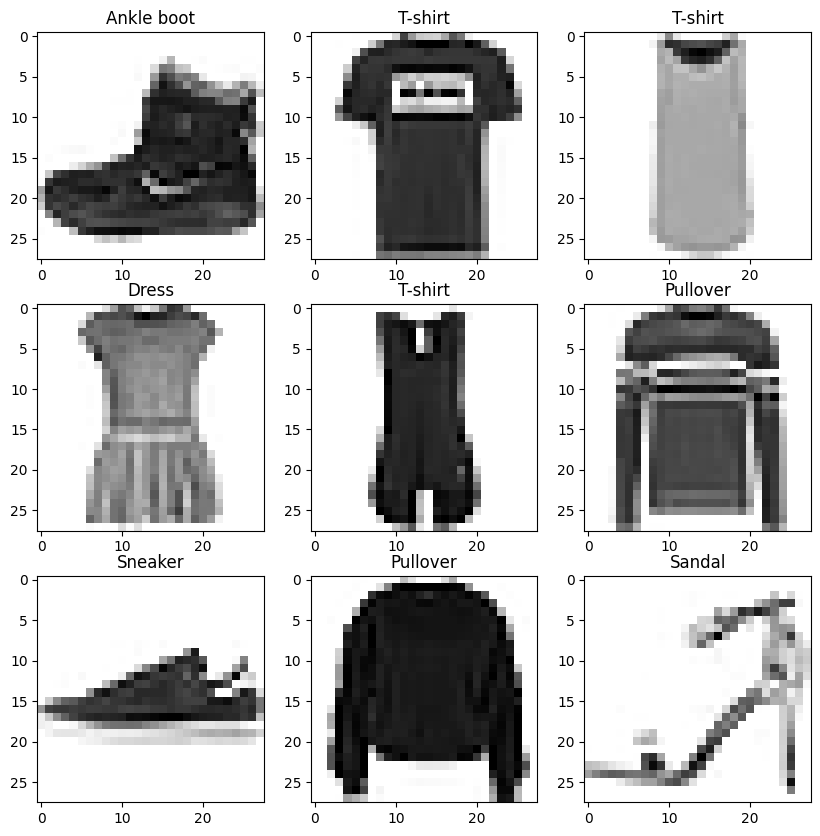

In [ ]:

from keras.datasets import fashion_mnist

# Load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Define class names
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

fig,axis=plt.subplots(nrows=3, ncols=3, figsize=(10,10))

for i,ax in enumerate(axis.flat):
  ax.imshow(X_train[i], cmap='binary')
  ax.set_title(class_names[y_train[i]])
plt.show()

In [7]:
#loading the dataset

from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

class_names= ['T-shirt', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [8]:
val,ind = np.unique(y_train, return_index=True)
print(val)
print(ind)

[0 1 2 3 4 5 6 7 8 9]
[ 1 16  5  3 19  8 18  6 23  0]


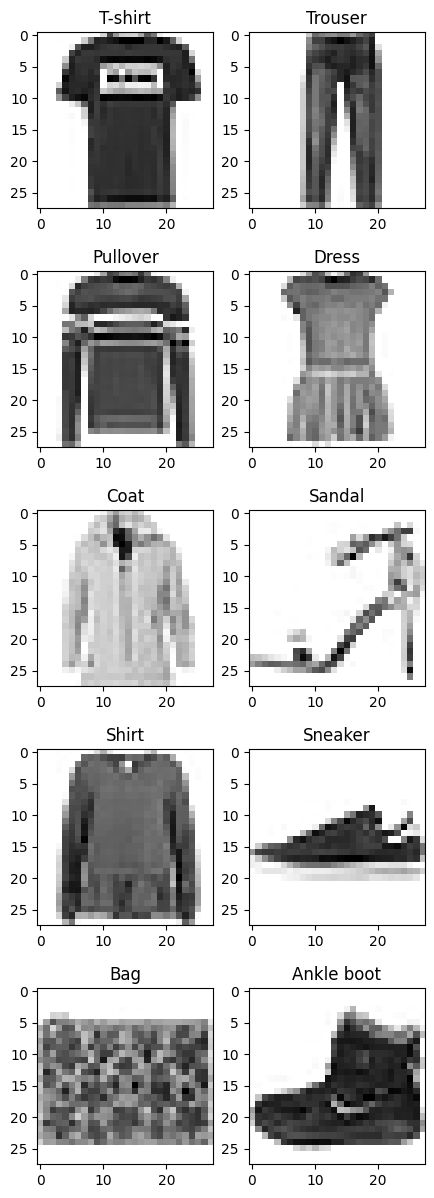

In [9]:
fig,axis=plt.subplots(nrows=5, ncols=2, figsize=(5,15))
for ax, idx in zip(axis.flat, ind):
  ax.imshow(X_train[idx], cmap='binary')
  ax.set_title(class_names[y_train[idx]])
plt.show()

In [10]:

random_indices = np.array([np.random.choice(len(images)) for images in label_groups.values()])

print("Random Indices as 1D Array:", random_indices)

NameError: name 'label_groups' is not defined

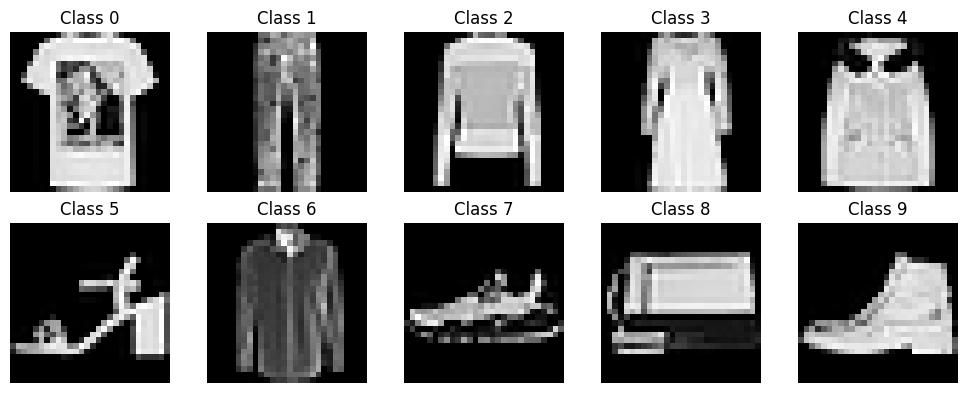

In [19]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Get unique classes
classes = np.unique(y_train)

# Select random images from each class
random_images = []
for class_id in classes:
    # Find all occurrences of the class
    indices = np.where(y_train == class_id)[0]
    # Select a random index from the occurrences
    random_idx = np.random.choice(indices)
    random_images.append((x_train[random_idx], class_id))

# Initialize a Wandb run for project "DL_A1"
wandb.init(project="DL_A1")

# Log random images to Wandb
wandb_images = [wandb.Image(img, caption=f"Class {label}") for img, label in random_images]
wandb.log({"random_class_images": wandb_images})

# Plot the random images locally for verification
fig, axs = plt.subplots(2, 5, figsize=(10, 4))
for i, (img, label) in enumerate(random_images):
    axs[i // 5, i % 5].imshow(img, cmap='gray')
    axs[i // 5, i % 5].set_title(f'Class {label}')
    axs[i // 5, i % 5].axis('off')

plt.tight_layout()
plt.show()

In [20]:
import numpy as np
import wandb
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset globally to avoid reloading every time
(x_train, y_train), _ = fashion_mnist.load_data()

def random_image_logging():
    # Initialize Wandb run
    wandb.init()

    # Get unique classes
    classes = np.unique(y_train)

    # Select random images from each class
    random_images = []
    for class_id in classes:
        indices = np.where(y_train == class_id)[0]
        random_idx = np.random.choice(indices)
        random_images.append((x_train[random_idx], class_id))

    # Log random images to Wandb
    wandb_images = [wandb.Image(img, caption=f"Class {label}") for img, label in random_images]
    wandb.log({"random_class_images": wandb_images})

    # Finish the Wandb run
    wandb.finish()


In [21]:
sweep_config = {
    "method": "random",  # Random search method for sweep runs
    "metric": {
        "name": "accuracy",  # Placeholder metric (can be replaced with relevant metric)
        "goal": "maximize"
    },
    "parameters": {
        "step": {"values": [0, 1, 2, 3]},  # Step slider range [0, 3]
        "index": {"min": 0, "max": 9}      # Index slider range (for classes)
    }
}


In [22]:
# Initialize the sweep
sweep_id = wandb.sweep(sweep_config, project="DL_A1")

# Run the sweep for 150 iterations
wandb.agent(sweep_id, function=random_image_logging, count=150)


wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


Create sweep with ID: aitmuzx6
Sweep URL: https://wandb.ai/cs24m016-indian-institute-of-technology-madras/DL_A1/sweeps/aitmuzx6


Streaming output truncated to the last 5000 lines.
    wandb.finish(exit_code=1)
  File "/usr/local/lib/python3.11/dist-packages/wandb/sdk/wandb_run.py", line 4130, in finish
    wandb.run.finish(exit_code=exit_code, quiet=quiet)
  File "/usr/local/lib/python3.11/dist-packages/wandb/sdk/wandb_run.py", line 449, in wrapper
    return func(self, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/wandb/sdk/wandb_run.py", line 391, in wrapper
    return func(self, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/wandb/sdk/wandb_run.py", line 2106, in finish
    return self._finish(exit_code)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/wandb/sdk/wandb_run.py", line 2113, in _finish
    with telemetry.context(run=self) as tel:
  File "/usr/local/lib/python3.11/dist-packages/wandb/sdk/lib/telemetry.py", line 42, in __exit__
    self._run._telemetry

Error in callback <bound method _WandbInit._pause_backend of <wandb.sdk.wandb_init._WandbInit object at 0x78d783798e90>> (for post_run_cell):


BrokenPipeError: [Errno 32] Broken pipe